This IPython Notebook shows an example on how to easliy analyze data produced by ZEN's image analysis.

1. 26 out of of 96 wells with 1 position per well were used for acquistion
2. 2 CSV tables were created
  * one containing the info for all objects per well
  * one containing all single objects --> this is the one that contains all the information
 
Finally the two tables were saved to hard disk. This whole procedure can be completely automated via OAD, if required.
 
**It is also possible to start the analysis steps below from within an OAD macro.**

Remark: This notebook illustrates the possibilities to play around with those test images and data.

<img src="Data\Zen_Wellplate_Experiment_26Wells_1Pos.png" />

The image above shows the actual setup of the test experiment used to create the data. The resulting image is analyzed in ZEN using a built-in image analyis. The cricial step during the setup of the analysis is to select the correct features that are important to be able to correctly assign the data later on when using the pandas library.

<img src="Data\Zen_Wellplate_Experiment_IAS1.png" />
<img src="Data\Zen_Wellplate_Experiment_IAS2.png" />

The result of such an image analyis is shown below. The resulting table can be saves as a CSV table and the imported into Python using the Pandas library.

<img src="Data\Zen_Wellplate_Experiment_IAS3.png" />

Now we are ready to start using the Python.

**To simplify te required function are placed inside a separate model called wellplate_tools_pandas. This will not explained here in detail.**

In [2]:
# do the required imports
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r'Modules')
import wellplate_tools_pandas_py3_5 as wpt
%matplotlib inline

# define the filenames
filename_single = 'Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions.csv'

In [3]:
# define wellplate type
platetype = 96
# get numer of rows and columns
Nr, Nc = wpt.getrowandcolumn(platetype)

# read the CSV table containing all the single object data for
# further "in-depth" analysis
df_single = pd.read_csv(filename_single, sep=';')

# get headers and number of measurment parameters
# default number of non-measurement parameters = 5 (the first five columns from ZEN CSV Export)
num_nonmp = 5
headers = df_single.head(0)
num_param = len(df_single.columns) - num_nonmp
print('Number of Object Parameters: ', num_param)
df_single.rename(columns={df_single.columns[0]: 'WellID',
                        df_single.columns[1]: 'RowID',
                        df_single.columns[2]: 'ColumnID',
                        df_single.columns[3]: 'ID',
                        df_single.columns[4]: 'Index'}, inplace=True)

Number of Object Parameters:  4


In [4]:
# remove rows with units
df_single = wpt.remove_units(df_single)
# convert decimal separators
df_single = wpt.convert_dec_sep(df_single)

# show part of dataframe
df_single[:3]

,WellID,RowID,ColumnID,ID,Index,IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R,Area::Area!!R,Perimeter::Perimeter!!R,Roundness::Roundness!!R
1,A1,1.0,1.0,2.0,1.0,88.544643,369.359872,72.898118,0.685591
2,A1,1.0,1.0,3.0,2.0,89.075472,524.359104,88.930542,0.562352
3,A1,1.0,1.0,4.0,3.0,127.159184,807.974720,108.412448,0.612860


In [5]:
# use statistics --> we just calculate the mean values
# for a wells to be displayed inside the heatmaps.
# currently implemented are mean, median, min, max.
stf = 'mean'

# create a dictionary containing a dataframe for every measure parameters
# as a heatmap and a dictionary containing the mean values for all wells
# containing actual data points.
heatmap_dict, well_dict = wpt.fill_heatmaps(df_single, num_param, Nr, Nc, statfunc=stf, showbar=True, verbose=False)

# show all keys
print(heatmap_dict.keys())

---------------------------------------------------
wellID_key :  WellID
Found keys:
Index(['WellID', 'RowID', 'ColumnID', 'ID', 'Index',
       'IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R',
       'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R'],
      dtype='object')
---------------------------------------------------


A Jupyter Widget

dict_keys(["IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'ObjectNumbers'])


In [6]:
# example for entry for well C3
well_dict['C3']

WellID                                                                 C3
RowID                                                                   3
ColumnID                                                                3
IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R     63.3364
Area::Area!!R                                                     531.537
Perimeter::Perimeter!!R                                           89.3823
Roundness::Roundness!!R                                          0.592467
ObjectNumbers                                                         170
Name: 23, dtype: object

This is brief description about the steps executed inside the **fill_heatmaps** function. It creates a dictionary containing heatmaps (dataframes) for all measured parameters.
    
1. Determine how many wells actually contain data
2. Loop over all wells
3. Extract only data fro current well from dataframe and calc statistics
4. Save the results in a dictionary containing entries for all wells
5. Fill the arrays with the values for the measured parameters from the well dictionary
6. Create a dictionary that contains heatmaps (dataframes) for all measured parameters

Input Parameters:

* input data frame
* number of measured parameters except the object number
* number of rows of well plate --> 96 plate = 8
* number of rows of well plate --> 96 plate = 12
* choice which statistics should be calculated

Output Parameters:

* dictionary containing one dataframe for all measured parameters plus one entry the object numbers
* dictionary containing entries for every well analyzed with the values calculated by the statistical function

Heatmap image saved as:  Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions_HM_ObjectNumbers.png


'Data\\96Well_Ch=1_26Wells_1P_Well_SingleRegions_HM_ObjectNumbers.png'

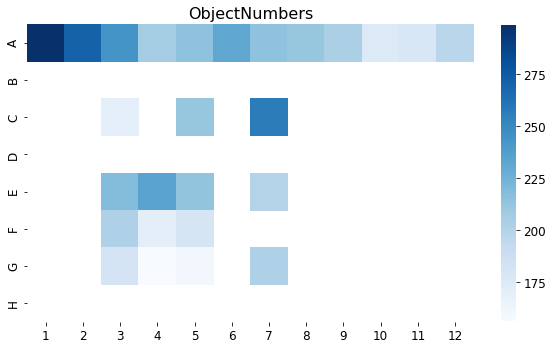

In [7]:
# define parameters to display the heatmap
parameter2display = 'ObjectNumbers'
colormap='Blues'
#colormap ='YlGnBu'
#colormap ='RdBu_r'
#colormap = 'RdYlBu'
hm = heatmap_dict[parameter2display]

# show the heatmap for a single parameter
wpt.showheatmap(hm, parameter2display, fontsize_title=16, fontsize_label=12,
               colormap=colormap, save=True, filename=filename_single)

In [8]:
# show all key = measure parameters for that dictionary
heatmap_dict.keys()

dict_keys(["IntensityMean_DAPI::Intensity Mean Value of channel 'DAPI'!!R", 'Area::Area!!R', 'Perimeter::Perimeter!!R', 'Roundness::Roundness!!R', 'ObjectNumbers'])

In [9]:
# show example entry of the dictionary for a parameter
heatmap_dict['ObjectNumbers']

,1,2,3,4,5,6,7,8,9,10,11,12
A,326.0,271.0,244.0,207.0,215.0,233.0,215.0,212.0,204.0,176.0,179.0,198.0
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,170.0,NaN,212.0,NaN,257.0,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,219.0,235.0,214.0,NaN,200.0,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,202.0,171.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,182.0,152.0,161.0,NaN,202.0,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Heatmap image saved as:  Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions_HM_all.png


'Data\\96Well_Ch=1_26Wells_1P_Well_SingleRegions_HM_all.png'

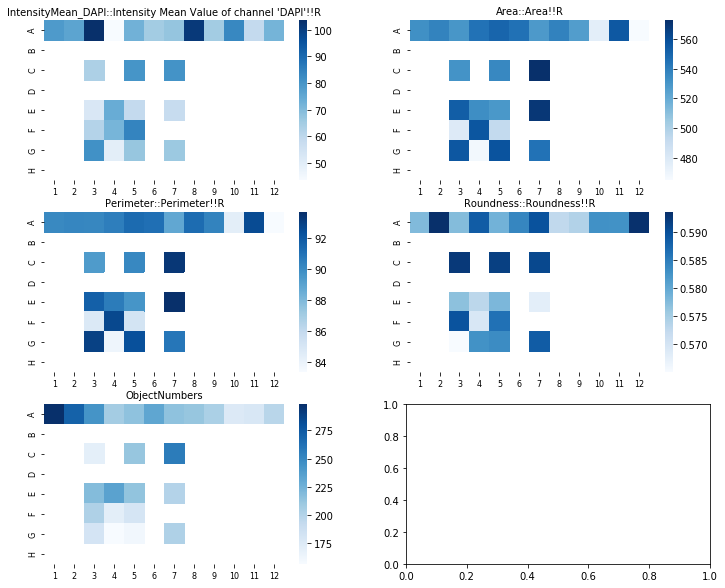

In [10]:
# define parameters to display the heatmap
fs_title = 10
fs_label = 8
#colormap ='YlGnBu'
#colormap ='RdBu_r'
colormap = 'Blues'

# show all heatmaps
wpt.showheatmap_all(heatmap_dict, [3, 2], fontsize_title=fs_title, fontsize_label=fs_label,
                    colormap='Blues', save=True, filename=filename_single)